<a href="https://colab.research.google.com/github/khanhc/AI_W4_24_02_23/blob/main/AI_W4_24_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=02f9232ce10e9f2f4ebcda8e25b7869f4c22483439c6c5894d30504c7bc04c60
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


17.03225806451612


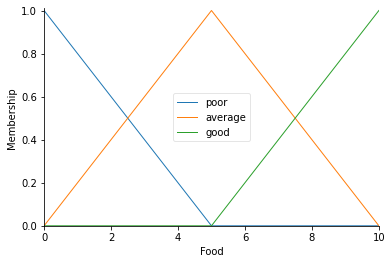

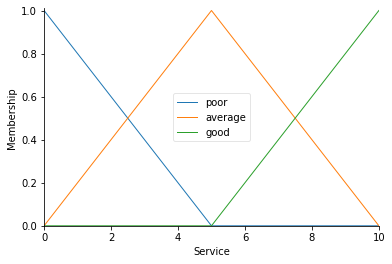

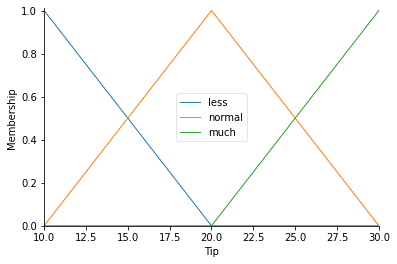

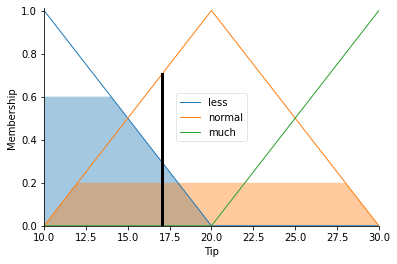

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'Food')
service=ctrl.Antecedent(np.arange(0,11,1),'Service')
tip=ctrl.Consequent(np.arange(10,31,1),'Tip')
food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])
service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])
tip['less']=fuzz.trimf(tip.universe,[10,10,20])
tip['normal']=fuzz.trimf(tip.universe,[10,20,30])
tip['much']=fuzz.trimf(tip.universe,[20,30,30])
food.view()
service.view()
tip.view()
rule1=ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2=ctrl.Rule(food['average']&service['poor'],tip['less'])
rule3=ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule4=ctrl.Rule(food['poor']&service['average'],tip['less'])
rule5=ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6=ctrl.Rule(food['good']&service['average'],tip['normal'])
rule7=ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule8=ctrl.Rule(food['average']&service['good'],tip['much'])
rule9=ctrl.Rule(food['good']&service['good'],tip['much'])
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Food']=1
tipping.input['Service']=2
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim=tipping)

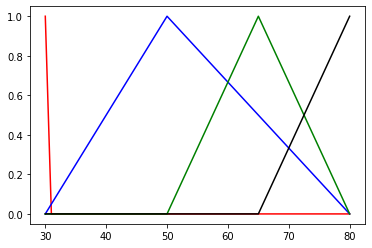

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,81,1)
slow=fuzz.trimf(x,[30,30,30])
medium=fuzz.trimf(x,[30,50,80])
medium_fast=fuzz.trimf(x,[50,65,80])
full_speed=fuzz.trimf(x,[65,80,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='SLOW')
plt.plot(x,medium,'b',linewidth=1.5,label='MEDIUM')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='MEDIUM_FAST')
plt.plot(x,full_speed,'black',linewidth=1.5,label='FULL_SPEED')

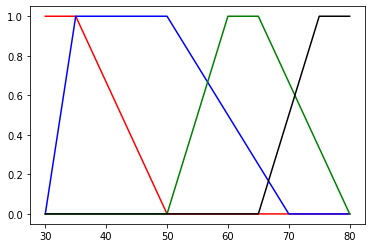

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,81,1)
slow1=fuzz.trapmf(x,[30,30,35,50])
medium1=fuzz.trapmf(x,[30,35,50,70])
medium_fast1=fuzz.trapmf(x,[50,60,65,80])
full_speed1=fuzz.trapmf(x,[65,75,80,80])
plt.figure()
plt.plot(x,slow1,'r',linewidth=1.5,label='SLOW1')
plt.plot(x,medium1,'b',linewidth=1.5,label='MEDIUM1')
plt.plot(x,medium_fast1,'g',linewidth=1.5,label='MEDIUM_FAST1')
plt.plot(x,full_speed1,'black',linewidth=1.5,label='FULL_SPEED1')

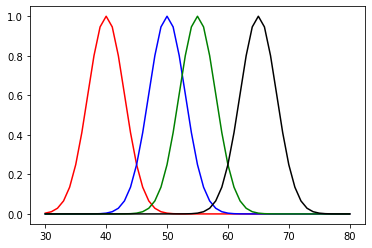

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(30,81,1)
slow1=fuzz.gaussmf(x,40,3)
medium1=fuzz.gaussmf(x,50,3)
medium_fast1=fuzz.gaussmf(x,55,3)
full_speed1=fuzz.gaussmf(x,65,3)
plt.figure()
plt.plot(x,slow1,'r',linewidth=1.5,label='SLOW1')
plt.plot(x,medium1,'b',linewidth=1.5,label='MEDIUM1')
plt.plot(x,medium_fast1,'g',linewidth=1.5,label='MEDIUM_FAST1')
plt.plot(x,full_speed1,'black',linewidth=1.5,label='FULL_SPEED1')

68.26241134751768


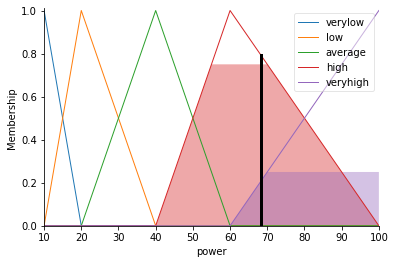

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(0,181,1),'time')
rice = ctrl.Antecedent(np.arange(0,1001,1),'rice')
power = ctrl.Consequent(np.arange(10,101,1),'power')

time['veryfast']= fuzz.trimf(time.universe,[0,0,30])
time['fast'] = fuzz.trimf(time.universe, [0,20,40])
time['normal']= fuzz.trimf(time.universe, [20,40,60])
time['slow']= fuzz.trimf(time.universe, [40,60,180])
time['veryslow']= fuzz.trimf(time.universe, [60,180,180])

rice['verylittle']= fuzz.trimf(rice.universe,[100,100,300])
rice['little'] = fuzz.trimf(rice.universe, [100,300,500])
rice['average']= fuzz.trimf(rice.universe, [300,500,600])
rice['much']= fuzz.trimf(rice.universe, [500,600,1000])
rice['verymuch']= fuzz.trimf(rice.universe,[600,1000,1000])

power['verylow'] = fuzz.trimf(power.universe, [10,10,20])
power['low'] = fuzz.trimf(power.universe,[10,20,40])
power['average'] = fuzz.trimf(power.universe,[20,40,60])
power['high'] = fuzz.trimf(power.universe,[40,60,100])
power['veryhigh'] = fuzz.trimf(power.universe,[60,100,100])

rule1 = ctrl.Rule(time['veryfast'] & rice['verylittle'], power['high'])
rule2 = ctrl.Rule(time['veryfast'] & rice['little'], power['high'])
rule3 = ctrl.Rule(time['veryfast'] & rice['average'], power['veryhigh'])
rule4 = ctrl.Rule(time['veryfast'] & rice['much'], power['veryhigh'])
rule5 = ctrl.Rule(time['veryfast'] & rice['verymuch'], power['veryhigh'])

rule6 = ctrl.Rule(time['fast'] & rice['verylittle'], power['high'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['high'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['high'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['veryhigh'])
rule10 = ctrl.Rule(time['fast'] & rice['verymuch'],power['veryhigh'])

rule11 = ctrl.Rule(time['normal'] & rice['verylittle'], power['verylow'])
rule12 = ctrl.Rule(time['normal'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['normal'] & rice['average'], power['average'])
rule14 = ctrl.Rule(time['normal'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['normal'] & rice['verymuch'], power['veryhigh'])
                   
rule16 = ctrl.Rule(time['slow'] & rice['verylittle'], power['low'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['low'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['verylow'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['verylow'])
rule20 = ctrl.Rule(time['slow'] & rice['verymuch'], power['verylow'])

rule21 = ctrl.Rule(time['veryslow'] & rice['verylittle'], power['verylow'])
rule22 = ctrl.Rule(time['veryslow'] & rice['little'], power['verylow'])
rule23 = ctrl.Rule(time['veryslow'] & rice['average'], power['verylow'])
rule24 = ctrl.Rule(time['veryslow'] & rice['much'], power['verylow'])
rule25 = ctrl.Rule(time['veryslow'] & rice['verymuch'], power['verylow'])

cpower_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
cpower = ctrl.ControlSystemSimulation(cpower_ctrl)
cpower.input['time'] = 20
cpower.input['rice'] = 350
cpower.compute()
print(cpower.output['power'])
power.view(sim = cpower)